<center>
<img src="https://i.imgur.com/kgfTV2c.png" width="150">
</center>

###### <center>Universidad Nacional Jorge Basadre Grohmann | Facultad de Ingeniería </center>
###### <center> Escuela Profesional de Ingeniería en Informática y Sistemas </center>
---

# <center> Problema de clasificación usando redes neuronales </center>
<center>

 **Curso:** <br>
 Inteligencia Artificial

 **Docente:** <br>
 Ing. Israel Chaparro

 **Integrantes:** <br>
Jorge Jefferson Velásquez Valdivia<br>
Aldo Antero Centeno Maquera<br>
Luis Miguel Chambilla Quispe<br>
Richard Smith Ticona Copari<br>
Aron Choque Copa<br>
</center>




## Introducción.

---

Lo que haremos será predecir si una persona tiende a tener un ataque al corazón de acuerdo a algunas características específicas. Esta data, tiene las siguientes características:

> * **age:** Edad del paciente
> * **sex:** Sexo del paciente (1 si es hombre, 0 si es mujer)
> * **cp:** Es el tipo de dolor de pecho que presenta el paciente, este puede ser de 4 tipos por lo que los valores que pueden tomar son [0,1,2,3]
> * **trestbps:** Esta caracteristica representa la presión arterial en reposo
> * **chol:** Esta caracteristica representa el colesterol serico medido en mg/dl
> * **fbs:** Es un valor que es 1 si la cantidad de glucosa en la sangre supera los 120 y 0 si no lo hace
> * **restecg:** Este valor representa los resultados de un electrocardiograma hecho en reposo aplicado al paciente, el cual se clasifica en 3 grupos.
> * **thalach:** Este valor es la medida de la frecuencia cardiaca maxima alcanzada por el paciente
> * **exang:** Es te valor es 1 si el paciente presenta angina inducida por el ejercicio, y 0 si no es así
> * **oldpeak:** Este valor representa la depresión ST inducida por ejercicio relativo al descanso
> * **slope:** Este valor representa la pendiente del segmento de pico de ejercicio ST
> * **ca:** Este valor representa cuantos vasos principales fueron coloreados por fluorosopía
> * **thal:** La talasemia es un trastorno de la sangre hereditario (es decir, se pasa de los padres a los hijos a través de los genes) que ocurre cuando el cuerpo no produce la cantidad suficiente de una proteína llamada hemoglobina, una parte importante de los glóbulos rojos.

Nuestro objetivo sería el target:

> * **target:** este valor es 1 si es que tiende a tener un ataque al corazón, y 0 si es que no es así.

## Implementación.
---


Primero lo que haremos es importar las librerías que necesitaremos a lo largo del proyecto:

>* **NumPy:** Proporciona soporte para trabajar con matrices y operaciones matemáticas de manera eficiente. Es ampliamente utilizado en el procesamiento numérico y científico de datos.

>* **Pandas:** Ofrece estructuras de datos flexibles y herramientas de análisis de datos de alto rendimiento. Es especialmente útil para la manipulación, limpieza y análisis de datos tabulares.

>* **TensorFlow:** Es una biblioteca de código abierto para la inteligencia artificial y el aprendizaje automático. Proporciona un marco para construir y entrenar modelos de aprendizaje profundo.

>* **Keras:** Es una API de alto nivel construida sobre TensorFlow. Facilita la construcción y entrenamiento de modelos de aprendizaje profundo, permitiendo una implementación más rápida y sencilla. aquí también estamos sacando el módulo **layers**, que proporciona una amplia variedad de capas predefinidas cómo la dense que usaremos para las capas densas.

>* **Matplotlib:** Permite la creación de gráficos y visualizaciones en Python. Es una biblioteca muy utilizada para representar datos de manera visual y comprensible.

>* **Seaborn:** Proporciona una interfaz de alto nivel para crear gráficos informativos y atractivos. Se utilizó para la matriz de confusión.

>* **Sklearn.metrics:** proporciona varias métricas y herramientas para evaluar y comparar modelos de aprendizaje automático. en nuestro caso usaremos las funciones **accuracy_score** para la precisión, y **confusion_matrix** para la matriz de confusión.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

Ahora, toca ingresar nuestra data sobre ataques al corazón. Lo que haremos será cargar un archivo 'heart.csv' y almacenarlo en un DataFrame llamado dataset.

In [ ]:
dataset = pd.read_csv('heart.csv', delimiter=",")

In [ ]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Ahora dividiremos en dos DataFrames de manera aleatoria: la data de entrenamiento (train_dataset) que contiene el 80% de los datos para entrenamiento y la data para el test (test_dataset) que contiene el 20% restante para pruebas. Estos conjuntos de datos los vamos a utilizar para entrenar y evaluar los modelos.

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

También separaremos las características (atributos) y las etiquetas (objetivo) de los conjuntos de datos de entrenamiento y prueba.


In [ ]:
train_features = train_dataset.drop("target", axis=1)
train_labels = train_dataset["target"]
test_features = test_dataset.drop("target", axis=1)
test_labels = test_dataset["target"]

In [ ]:
train_features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
807,44,1,2,130,233,0,1,179,1,0.4,2,0,2
27,58,0,1,136,319,1,0,152,0,0.0,2,2,2
77,63,1,0,140,187,0,0,144,1,4.0,2,2,3
406,58,1,2,140,211,1,0,165,0,0.0,2,0,2
886,61,1,0,120,260,0,1,140,1,3.6,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,67,0,2,115,564,0,0,160,0,1.6,1,0,3
25,61,0,0,145,307,0,0,146,1,1.0,1,0,3
110,44,1,0,110,197,0,0,177,0,0.0,2,1,2
149,39,1,2,140,321,0,0,182,0,0.0,2,0,2


In [ ]:
test_features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2
11,43,0,0,132,341,1,0,136,1,3.0,1,0,3
19,58,1,2,140,211,1,0,165,0,0.0,2,0,2
23,63,0,2,135,252,0,0,172,0,0.0,2,0,2
28,56,1,2,130,256,1,0,142,1,0.6,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,55,0,0,180,327,0,2,117,1,3.4,1,0,2
990,56,1,1,120,236,0,1,178,0,0.8,2,0,2
1001,42,1,0,140,226,0,1,178,0,0.0,2,0,2
1005,55,0,0,128,205,0,2,130,1,2.0,1,1,3


Ahora realizaremos la normalización de las características en los conjuntos de entrenamiento y prueba ( CE - MDE) / DEDE. </br>
Donde: </br>


*   Carcterísticas de datos de entrenamiento.
*   Media de los datos de entrenamiento.
*   Desviación estandard de los datos de entrenamiento.

Esto nos ayudará para escalar las características y asegurar que tengan una escala similar.

In [ ]:
train_mean = train_features.mean()
train_std = train_features.std()
train_features = (train_features - train_mean) / train_std
test_features = (test_features - train_mean) / train_std

In [ ]:
train_features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
807,-1.129462,0.646664,1.039204,-0.088825,-0.238468,-0.419828,0.867215,1.286097,1.410770,-0.573030,0.983743,-0.725025,-0.537546
27,0.407913,-1.544512,0.063090,0.250740,1.446745,2.379024,-1.039263,0.097245,-0.707969,-0.908183,0.983743,1.205236,-0.537546
77,0.956976,0.646664,-0.913023,0.477117,-1.139861,-0.419828,-1.039263,-0.255007,1.410770,2.443348,0.983743,1.205236,1.059510
406,0.407913,0.646664,1.039204,0.477117,-0.669569,2.379024,-1.039263,0.669655,-0.707969,-0.908183,0.983743,-0.725025,-0.537546
886,0.737351,0.646664,-0.913023,-0.654768,0.290611,-0.419828,0.867215,-0.431133,1.410770,2.108195,-0.607321,0.240106,1.059510
...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,1.396226,-1.544512,1.039204,-0.937739,6.247643,-0.419828,-1.039263,0.449498,-0.707969,0.432429,-0.607321,-0.725025,1.059510
25,0.737351,-1.544512,-0.913023,0.760088,1.211599,-0.419828,-1.039263,-0.166944,1.410770,-0.070300,-0.607321,-0.725025,1.059510
110,-1.129462,0.646664,-0.913023,-1.220710,-0.943906,-0.419828,-1.039263,1.198034,-0.707969,-0.908183,0.983743,0.240106,-0.537546
149,-1.678525,0.646664,1.039204,0.477117,1.485936,-0.419828,-1.039263,1.418192,-0.707969,-0.908183,0.983743,-0.725025,-0.537546


Una vez entrenado el modelo, vamos a agregar las capas densas del modelo (una capa de entrada, dos capas intermedias y una capa de salida). En un inicio utilizamos 1024, 512, 256 capas con una capa de salida.
Luego de varias pruebas, terminamos ajustándolo a -- con una capa de salida. </br>
Por último utilizamos el sigmoide debido a que esta mapea los valores de entrada a un rango de salida entre 0 y 1.

In [ ]:
# DEFINIMOS EL MODELO DE RED NEURONAL
model = keras.Sequential([
    layers.Dense(1024, activation="relu", input_shape=[len(train_features.keys())]),
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              14336     
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 670,721
Trainable params: 670,721
Non-trainable params: 0
_________________________________________________________________


Aquí usamos la función binary crossentropy que funciona mejor para clasificación que la función MSE debido a que nuestros datos son de salida binaria [0, 1].

In [ ]:
# SE COMPILA
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

Ahora simplemente entrenamos el modelo.

In [ ]:
# Train the model
history = model.fit(train_features, train_labels, epochs=100, validation_data=(test_features, test_labels))

Epoch 1/100
26/26 [==============================] - 3s 30ms/step - loss: 0.3862 - accuracy: 0.8329 - val_loss: 0.3187 - val_accuracy: 0.8780
Epoch 2/100
26/26 [==============================] - 0s 19ms/step - loss: 0.2576 - accuracy: 0.9061 - val_loss: 0.3511 - val_accuracy: 0.8244
Epoch 3/100
26/26 [==============================] - 0s 19ms/step - loss: 0.1790 - accuracy: 0.9341 - val_loss: 0.1916 - val_accuracy: 0.9220
Epoch 4/100
26/26 [==============================] - 0s 17ms/step - loss: 0.1088 - accuracy: 0.9524 - val_loss: 0.1780 - val_accuracy: 0.9171
Epoch 5/100
26/26 [==============================] - 0s 17ms/step - loss: 0.0693 - accuracy: 0.9805 - val_loss: 0.0785 - val_accuracy: 0.9512
Epoch 6/100
26/26 [==============================] - 0s 17ms/step - loss: 0.0360 - accuracy: 0.9878 - val_loss: 0.0443 - val_accuracy: 0.9902
Epoch 7/100
26/26 [==============================] - 0s 19ms/step - loss: 0.0208 - accuracy: 0.9927 - val_loss: 0.0323 - val_accuracy: 0.9951
Epoch 

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_features, test_labels)

7/7 [==============================] - 0s 6ms/step - loss: 6.9742e-06 - accuracy: 1.0000


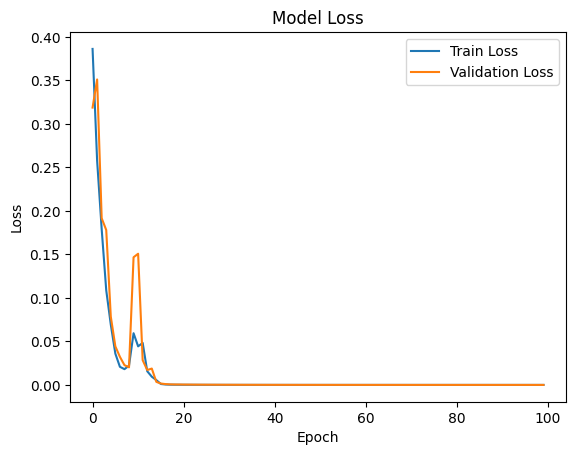

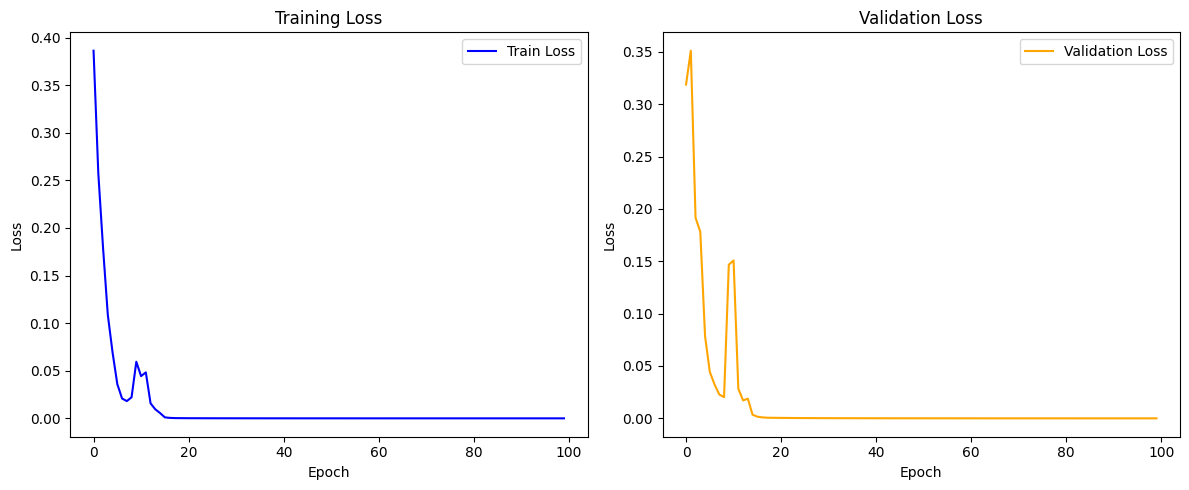

In [ ]:
# Grafico comparativo
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train Loss", "Validation Loss"], loc="upper right")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de Loss de entrenamiento
ax1.plot(history.history["loss"], color="blue")
ax1.set_title("Training Loss")
ax1.set_ylabel("Loss")
ax1.set_xlabel("Epoch")
ax1.legend(["Train Loss"], loc="upper right")

# Gráfico de Loss de validación
ax2.plot(history.history["val_loss"], color="orange")
ax2.set_title("Validation Loss")
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epoch")
ax2.legend(["Validation Loss"], loc="upper right")

# Ajustar los subplots para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos uno al lado del otro
plt.show()




</br></br></br> Lo siguiente es hacer la matriz de consistencia, esta es una herramienta utilizada para evaluar el rendimiento de un modelo de clasificación.  </br></br></br>
<center>
<img src="https://imgur.com/CFRZKmy.png" width="500">
</center>


7/7 [==============================] - 0s 4ms/step


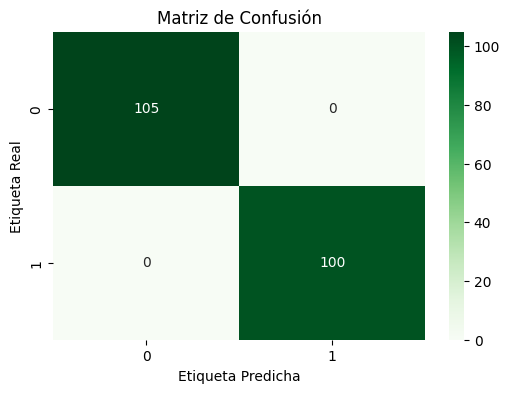

Accuracy: 100.00%


In [ ]:
# Obtener las salidas predichas del modelo
predictions = model.predict(test_features)

# Convertir las salidas predichas a clases binarias (0 o 1)
binary_predictions = (predictions > 0.5).astype(int)

# Construir la matriz de confusión
confusion = confusion_matrix(test_labels, binary_predictions)

# Calcular la precisión
accuracy = accuracy_score(test_labels, binary_predictions)

# Crear el gráfico de matriz de confusión utilizando Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, cmap="Greens", fmt="d")
plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

# Mostrar datos
print("Accuracy: {:.2f}%".format(accuracy * 100))

In [ ]:
# HACEMOS LA PREDICCION CON UN CONJUNTO DE DATOS
# data sin posible inferto al corazón
# new_data = np.array([[88,1,0,212,212,0,1,168,0,1,2,2,3]])
# data con posible infarto al corazón
new_data = np.array([[59	,1,	1	,140,	221	,0	,1,	164,	1,	0.0,	2,	0	,2]])

new_data = (new_data - train_mean.values.reshape(1, -1)) / train_std.values.reshape(1, -1)
prediction = model.predict(new_data)
binary_prediction = (prediction > 0.2).astype(int) # para el umbral
print("Predicted class:", binary_prediction[0][0])

1/1 [==============================] - 0s 73ms/step
Predicted class: 1


In [ ]:
train_labels.shape

(820,)

Compara con la predicción

26/26 [==============================] - 0s 4ms/step


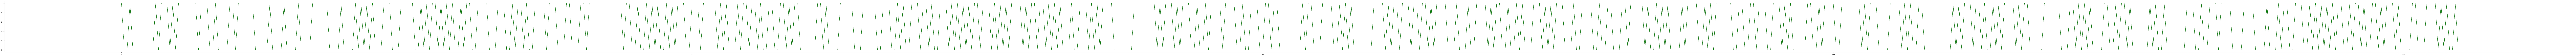

In [ ]:
plt.figure(figsize=(300,6))

plt.plot(np.arange(820), train_labels, linewidth=1, color='black')
plt.plot(np.arange(820), model.predict(train_features), linewidth=1, color='green')

plt.show()